### Generative Art: Circular dots by log-polar transform
$\rho=log\sqrt{(x^2+y^2)} \;,\; \theta=atan2(y\,,x)$
<br> by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai
<br>https://github.com/ostad-ai/Generative-Art

In [4]:
import numpy as np; from matplotlib import pyplot as plt
from numba import njit,prange; from math import atan2,sqrt,log,pi
from ipywidgets import interact

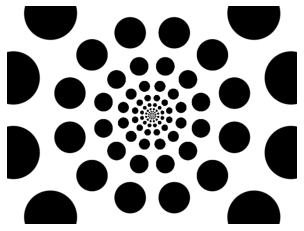

In [6]:
width,height=640,480; aspect=width/height
image=np.zeros((height,width),dtype='int')
@njit
def length(v):
    return sqrt(np.dot(v,v))
@njit 
def clamp(x,minVal,maxVal):
    return max(minVal,min(x,maxVal))
@njit
def smoothstep(low,high,x):
    t=(x-low)/(high-low) 
    t=clamp(t,0.,1.)
    return t*t*(3.-2*t)
@njit
def fract(x): 
    return x-np.floor(x)
@njit
def vec2(x,y):
    return np.array([x,y])
@njit 
def circle(p):
    return smoothstep(.35,.36,length(p))
@njit
def circular_dots(depth,image):
    uv=vec2(0.,0.)
    for x in prange(width):
        for y in prange(height):
            uv[:2]=x/width,y/height
            uv=2*uv-1.
            uv[0]*=aspect
            d=length(uv)/depth
            angle=atan2(uv[1],uv[0])
            pos=6*vec2(log(d),angle)/pi
            pos=fract(pos)-.5
            val=circle(pos)
            image[y,x]=int(255*val)
def run(depth=1.):
    circular_dots(depth,image)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()    
run()
# Uncomment line below to have an interactive demo
#interact(run,depth=(1.,5.,.1))